In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Processing

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#cleaning the Review
corpus = []
for i in range(0, 1000):
    
    #cleaning the special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])
    
    #Converting the entire review into Lower case
    review = review.lower()
    
    #Tokeninzing the review by words
    review_words = review.split()
    
     #Removing the stop words and Stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words if not word in set(stopwords.words('english'))]
    
    #Joining the stemmed words
    review = ' '.join(review)
    
    #Creating a corpus
    corpus.append(review)

In [8]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [9]:
#Creating the Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# Model Building

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
#Fitting Naive Bayes to the Training Set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("--------Scores---------")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is {}".format(round(score3,2)))

--------Scores---------
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is 0.79


In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[72 25]
 [22 81]]


Text(95.72222222222221, 0.5, 'Actual values')

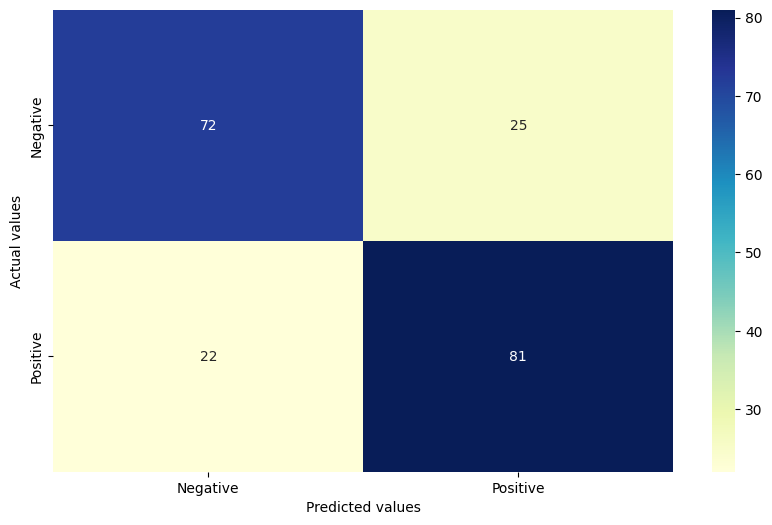

In [15]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [16]:
#Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('\n')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%


The best accuracy is 78.5% with alpha value as 0.2


In [17]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# predictions

In [18]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string= sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)



In [19]:
#Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review.")
else:
    print("This is a NEGATIVE review!.")
    

This is a POSITIVE review.


In [20]:
#Predicting values
sample_review = 'Food was pretty bad and the service was very slow'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review.")
else:
    print("This is a NEGATIVE review!.")

This is a NEGATIVE review!.


In [21]:
#Predicting values
sample_review = 'The Food was absolutely wonderful. from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review.")
else:
    print("This is a NEGATIVE review!.")

This is a POSITIVE review.


In [22]:
#Predicting values
sample_review = input("Give your feedback.")

if predict_sentiment(sample_review):
    print("This is a POSITIVE review.")
else:
    print("This is a NEGATIVE review!.")

This is a POSITIVE review.
